In [2]:
# Import required libraries

import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import the Dataset
df = pd.read_csv("iris.csv")

In [8]:
# View the number of rows and columns in our dataset
df.shape

(150, 5)

In [6]:
# Inspect the first five records of the dataset
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# KMeans Clustering is an unsupervise machine learning technique. We do not have an idea about what the number of actual classes.
# However the iris dataset contains that informaton. So the first thing we have to do is removing that information.
# Remove the "Class" column from the dataset

df_tr = df.drop('Class', axis=1)
y = df['Class']

In [10]:
# Standardize the data
# for more information refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

clmns = ['sepal-length', 'sepal-width','petal-length', 'petal-width']
df_tr_std = stats.zscore(df_tr[clmns])

In [11]:
# Cluster the data using KMeans
# For more information refer https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans = KMeans(n_clusters=2).fit(df_tr_std)

In [13]:
# Get the cluster labels

labels = kmeans.labels_
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [14]:
# Calculate silhouette_score

from sklearn.metrics import silhouette_score

print(silhouette_score(df_tr_std, kmeans.labels_))

0.580184463257396


In [15]:
# Now that we have lables to our data we can stick the lables to the dataset

df_tr['clusters'] = labels

In [16]:
# Add a new column name into our column list

clmns.extend(['clusters'])

In [18]:
# We can now analyze the clusters

df_tr.groupby(['clusters']).mean()

,sepal-length,sepal-width,petal-length,petal-width
clusters,,,,
0,5.006,3.418,1.464,0.244
1,6.262,2.872,4.906,1.676


Text(27.090347222222235, 0.5, 'petal-width')

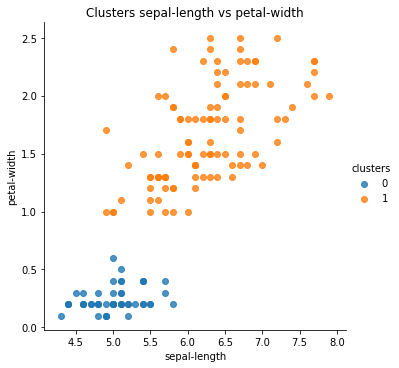

In [20]:
# We can plot the data in a Scatter plot to visualize the clusters.
# Chose two features to plot the scatter plot (sepal-length vs petal-width)
# For more information refer https://seaborn.pydata.org/generated/seaborn.scatterplot.html

sns.lmplot('sepal-length', 'petal-width', 
           data=df_tr, 
           fit_reg=False,
           hue="clusters")
plt.title('Clusters sepal-length vs petal-width')
plt.xlabel('sepal-length')
plt.ylabel('petal-width')

Text(34.54250000000001, 0.5, 'petal-width')

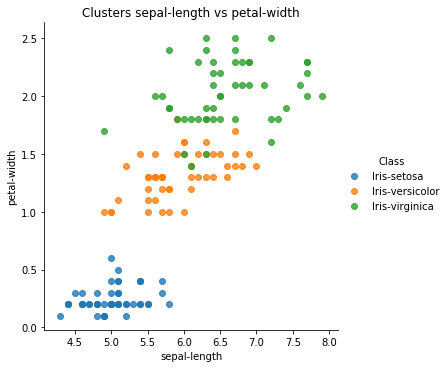

In [21]:
# Since we have the original clusters we can plot another scatter plot using that to compare our result with the original
# Scatter plot of sepal-length vs petal-width

sns.lmplot('sepal-length', 'petal-width', 
           data=df, 
           fit_reg=False, 
           hue="Class")
plt.title('Clusters sepal-length vs petal-width')
plt.xlabel('sepal-length')
plt.ylabel('petal-width')

In [34]:
# Download the wine.csv and create a Jupyter Notebook “kMeansWine.ipynb”. Do the following

#     a) Clean the dataset if necessary

#     b) Identify the best K value

#     c) Draw a scatter plot for the clustered data

#     d) Draw a scatter plot for the actual data

#     e) Submit the “kMeansWine.ipynb”